In [2]:
# Assuming you have already installed the datasets library:
# !pip install datasets pyarrow # pyarrow is good to have for parquet

from datasets import load_dataset
import pandas as pd # You might need this if you prefer saving as CSV/JSON from pandas

# Load the dataset
dataset = load_dataset("bitext/Bitext-customer-support-llm-chatbot-training-dataset")

# The 'dataset' object is a DatasetDict (contains 'train' and 'validation' splits)
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['flags', 'instruction', 'category', 'intent', 'response'],
        num_rows: 26872
    })
})


In [3]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("bitext/Bitext-customer-support-llm-chatbot-training-dataset")

# Access the main 'train' split
original_train_data = dataset['train']
print(f"Original training data size: {len(original_train_data)}")

# --- Step 1: Create a temporary train-test split ---
# We'll first split the original 'train' data into a new 'train' and a 'temp_test' set.
# Let's say 80% for new training and 20% for a temporary test set.
temp_splits = original_train_data.train_test_split(test_size=0.2, seed=42) # Using a seed for reproducibility

new_train_data = temp_splits['train']
temp_test_data = temp_splits['test']

print(f"New training data size: {len(new_train_data)}")
print(f"Temporary test data size: {len(temp_test_data)}")


# --- Step 2: Split the 'temp_test' into 'validation' and 'test' ---
# Now, take the `temp_test_data` and split it further.
# For example, split it 50/50 to get 10% for validation and 10% for final test (from original 20%).
final_splits = temp_test_data.train_test_split(test_size=0.5, seed=42) # 0.5 of 20% = 10%

validation_data = final_splits['train'] # The 'train' part of this split becomes your validation
test_data = final_splits['test']       # The 'test' part of this split becomes your final test

print(f"Validation data size: {len(validation_data)}")
print(f"Final test data size: {len(test_data)}")

# Now you have your desired splits:
# new_train_data
# validation_data
# test_data

Original training data size: 26872
New training data size: 21497
Temporary test data size: 5375
Validation data size: 2687
Final test data size: 2688


In [4]:
# Define paths to save your new splits
save_path_train = "./bitext_customer_support_train_split"
save_path_validation = "./bitext_customer_support_validation_split"
save_path_test = "./bitext_customer_support_test_split"

# Save the new training split
new_train_data.save_to_disk(save_path_train)
print(f"New training split saved to: {save_path_train}")

# Save the validation split
validation_data.save_to_disk(save_path_validation)
print(f"Validation split saved to: {save_path_validation}")

# Save the final test split
test_data.save_to_disk(save_path_test)
print(f"Final test split saved to: {save_path_test}")

Saving the dataset (0/1 shards):   0%|          | 0/21497 [00:00<?, ? examples/s]

New training split saved to: ./bitext_customer_support_train_split


Saving the dataset (0/1 shards):   0%|          | 0/2687 [00:00<?, ? examples/s]

Validation split saved to: ./bitext_customer_support_validation_split


Saving the dataset (0/1 shards):   0%|          | 0/2688 [00:00<?, ? examples/s]

Final test split saved to: ./bitext_customer_support_test_split


In [5]:
from datasets import load_dataset, load_from_disk
import pandas as pd

# Load your saved splits (assuming you saved them from the previous step)
new_train_data = load_from_disk("./bitext_customer_support_train_split")
validation_data = load_from_disk("./bitext_customer_support_validation_split")
test_data = load_from_disk("./bitext_customer_support_test_split")

print("Example from new_train_data:")
print(new_train_data[0])

# To view a few more examples and see the structure clearly
for i in range(3):
    print(f"\n--- Example {i+1} ---")
    print(f"Instruction: {new_train_data[i]['instruction']}")
    print(f"Response: {new_train_data[i]['response']}")
    print(f"Category: {new_train_data[i]['category']}")
    print(f"Intent: {new_train_data[i]['intent']}")
    # print(f"Flags: {new_train_data[i]['flags']}") # Check flags if it seems relevant

Example from new_train_data:
{'flags': 'BLM', 'instruction': 'I am trying to delete some items from order {{Order Number}}', 'category': 'ORDER', 'intent': 'change_order', 'response': 'Thank you for bringing this to our attention. I understand that you would like to delete some items from order number {{Order Number}}. We apologize for any inconvenience this may have caused. To facilitate the deletion process, could you please provide the specific details of the items you wish to remove? Once we receive the information, we will work swiftly to ensure the necessary modifications are made. Our ultimate goal is to provide you with a seamless and satisfactory shopping experience.'}

--- Example 1 ---
Instruction: I am trying to delete some items from order {{Order Number}}
Response: Thank you for bringing this to our attention. I understand that you would like to delete some items from order number {{Order Number}}. We apologize for any inconvenience this may have caused. To facilitate the

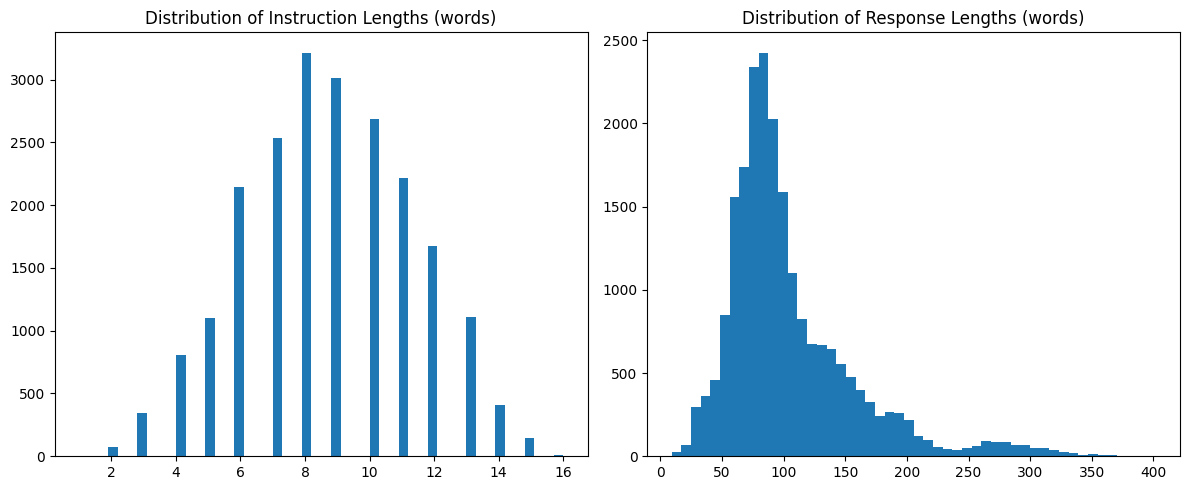

In [6]:
# For training data (new_train_data)
instruction_lengths = [len(x.split()) for x in new_train_data['instruction']]
response_lengths = [len(x.split()) for x in new_train_data['response']]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(instruction_lengths, bins=50)
plt.title('Distribution of Instruction Lengths (words)')
plt.subplot(1, 2, 2)
plt.hist(response_lengths, bins=50)
plt.title('Distribution of Response Lengths (words)')
plt.tight_layout()
plt.show()

In [7]:
print("\nCategory Distribution:")
print(pd.Series(new_train_data['category']).value_counts())
print("\nIntent Distribution:")
print(pd.Series(new_train_data['intent']).value_counts())


Category Distribution:
ACCOUNT         4776
ORDER           3174
REFUND          2414
DELIVERY        1612
PAYMENT         1607
SHIPPING        1593
INVOICE         1592
CONTACT         1588
FEEDBACK        1587
SUBSCRIPTION     785
CANCEL           769
Name: count, dtype: int64

Intent Distribution:
delivery_period             821
payment_issue               815
check_refund_policy         812
registration_problems       811
set_up_shipping_address     811
get_refund                  809
contact_customer_service    807
delete_account              803
switch_account              803
place_order                 801
complaint                   800
track_order                 796
check_invoice               796
get_invoice                 796
change_order                795
track_refund                793
check_payment_methods       792
delivery_options            791
edit_account                789
recover_password            788
review                      787
newsletter_subscription  

# EDA

In [8]:
# Make sure you have these installed:
# pip install pandas scikit-learn
# If you haven't already: pip install datasets

from datasets import load_from_disk
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re # For regular expressions in cleaning

In [9]:
# Load your saved splits
new_train_data = load_from_disk("./bitext_customer_support_train_split")
validation_data = load_from_disk("./bitext_customer_support_validation_split")
test_data = load_from_disk("./bitext_customer_support_test_split")

print("Splits loaded successfully.")

Splits loaded successfully.


In [10]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation (keeps letters, numbers, spaces)
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text

print("Text cleaning function defined.")

Text cleaning function defined.


In [11]:
# Create a dictionary to hold your processed data
processed_data = {}
label_encoder = LabelEncoder()

# Process Training Data
X_train_raw = new_train_data['instruction']
y_train_raw = new_train_data['intent']

X_train_cleaned = [clean_text(text) for text in X_train_raw]
y_train_encoded = label_encoder.fit_transform(y_train_raw) # Fit and transform on training labels

processed_data['X_train'] = X_train_cleaned
processed_data['y_train'] = y_train_encoded

# Process Validation Data
X_val_raw = validation_data['instruction']
y_val_raw = validation_data['intent']

X_val_cleaned = [clean_text(text) for text in X_val_raw]
y_val_encoded = label_encoder.transform(y_val_raw) # ONLY transform on validation labels (use same encoder as train)

processed_data['X_val'] = X_val_cleaned
processed_data['y_val'] = y_val_encoded


# Process Test Data
X_test_raw = test_data['instruction']
y_test_raw = test_data['intent']

X_test_cleaned = [clean_text(text) for text in X_test_raw]
y_test_encoded = label_encoder.transform(y_test_raw) # ONLY transform on test labels

processed_data['X_test'] = X_test_cleaned
processed_data['y_test'] = y_test_encoded

# Store the label encoder for later use (to convert numerical predictions back to intent names)
processed_data['label_encoder'] = label_encoder

print("\nData processing complete for all splits.")
print(f"Number of unique intents: {len(label_encoder.classes_)}")
print(f"Example original intent: {y_train_raw[0]}")
print(f"Example encoded intent: {y_train_encoded[0]}")
print(f"Example cleaned instruction: {X_train_cleaned[0]}")

# You can access your processed data like:
# X_train = processed_data['X_train']
# y_train = processed_data['y_train']
# X_val = processed_data['X_val']
# y_val = processed_data['y_val']
# X_test = processed_data['X_test']
# y_test = processed_data['y_test']
# le = processed_data['label_encoder'] # Use this to inverse_transform predictions


Data processing complete for all splits.
Number of unique intents: 27
Example original intent: change_order
Example encoded intent: 1
Example cleaned instruction: i am trying to delete some items from order order number


# Step 2: Implement Baseline Intent Detection Model (TF-IDF + Logistic Regression)

In [12]:
# Make sure these are installed:
# pip install scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd # For better display of classification report

In [13]:
# Assuming 'processed_data' dictionary is still in your environment
# If not, re-run the previous 'Data Preparation' cell to load it.
X_train = processed_data['X_train']
y_train = processed_data['y_train']
X_val = processed_data['X_val']
y_val = processed_data['y_val']
X_test = processed_data['X_test']
y_test = processed_data['y_test']
label_encoder = processed_data['label_encoder']

print(f"Loaded training data size: {len(X_train)}")
print(f"Loaded validation data size: {len(X_val)}")
print(f"Loaded test data size: {len(X_test)}")

Loaded training data size: 21497
Loaded validation data size: 2687
Loaded test data size: 2688


In [14]:
print("\n--- TF-IDF Vectorization ---")
# Initialize the TF-IDF Vectorizer
# max_features limits the number of features (vocabulary size), can help with memory/speed
# ngram_range=(1, 2) includes single words (unigrams) and two-word phrases (bigrams)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit the vectorizer on the TRAINING data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# ONLY transform the validation and test data (DO NOT fit again)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_val_tfidf shape: {X_val_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")
print("TF-IDF Vectorization complete.")


--- TF-IDF Vectorization ---
X_train_tfidf shape: (21497, 5000)
X_val_tfidf shape: (2687, 5000)
X_test_tfidf shape: (2688, 5000)
TF-IDF Vectorization complete.


In [15]:
print("\n--- Training Logistic Regression Model ---")
# Initialize the Logistic Regression model
# solver='liblinear' is good for smaller datasets and handles L1/L2 regularization
# multi_class='ovr' (one-vs-rest) is suitable for multi-class classification
log_reg_model = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=42, n_jobs=-1, max_iter=1000)

# Train the model
log_reg_model.fit(X_train_tfidf, y_train)

print("Logistic Regression model training complete.")


--- Training Logistic Regression Model ---


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


Logistic Regression model training complete.


In [16]:
print("\n--- Model Evaluation ---")

# Predict on the Validation Set
y_val_pred = log_reg_model.predict(X_val_tfidf)

print("\nValidation Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("\nClassification Report (Validation Set):")
# Use the label_encoder to get original intent names for the report
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_, zero_division=0))

# Predict on the Test Set
y_test_pred = log_reg_model.predict(X_test_tfidf)

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_, zero_division=0))

print("\nBaseline Model training and evaluation complete.")


--- Model Evaluation ---

Validation Set Evaluation:
Accuracy: 0.9914

Classification Report (Validation Set):
                          precision    recall  f1-score   support

            cancel_order       0.99      0.97      0.98       107
            change_order       0.94      0.99      0.97       104
 change_shipping_address       1.00      1.00      1.00        98
  check_cancellation_fee       0.99      1.00      1.00       107
           check_invoice       0.98      1.00      0.99        85
   check_payment_methods       1.00      0.98      0.99       101
     check_refund_policy       1.00      0.99      0.99        90
               complaint       1.00      1.00      1.00       120
contact_customer_service       1.00      0.99      0.99        94
     contact_human_agent       0.99      1.00      1.00       102
          create_account       0.99      0.98      0.99       114
          delete_account       0.97      1.00      0.99       102
        delivery_options     

In [17]:
# Predict on the Test Set
y_test_pred = log_reg_model.predict(X_test_tfidf)

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_, zero_division=0))


Test Set Evaluation:
Accuracy: 0.9922

Classification Report (Test Set):
                          precision    recall  f1-score   support

            cancel_order       0.98      0.96      0.97       109
            change_order       0.95      1.00      0.98        98
 change_shipping_address       1.00      0.99      0.99        93
  check_cancellation_fee       0.99      1.00      0.99        74
           check_invoice       0.97      0.98      0.98       119
   check_payment_methods       1.00      1.00      1.00       106
     check_refund_policy       1.00      1.00      1.00        95
               complaint       1.00      1.00      1.00        80
contact_customer_service       1.00      0.99      0.99        99
     contact_human_agent       0.99      1.00      1.00       116
          create_account       1.00      0.96      0.98       101
          delete_account       0.97      1.00      0.98        90
        delivery_options       1.00      1.00      1.00       105
 

# Step 3: Implement Sentiment Analysis

In [19]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Test with some example texts
text1 = "Thank you so much for your quick help, everything is resolved!"
result1 = sentiment_analyzer(text1)
print(f"Text: '{text1}'\nSentiment: {result1}")

text2 = "I am trying to delete some items from order 12345, this is ridiculous!"
result2 = sentiment_analyzer(text2)
print(f"\nText: '{text2}'\nSentiment: {result2}")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use mps:0


Text: 'Thank you so much for your quick help, everything is resolved!'
Sentiment: [{'label': 'POSITIVE', 'score': 0.9998431205749512}]

Text: 'I am trying to delete some items from order 12345, this is ridiculous!'
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9997761845588684}]


In [20]:
from datasets import load_from_disk
import pandas as pd
import re # For cleaning placeholders (optional, but good for suggestions)

# Load your new_train_data split (or the full 'dataset' if you want a larger KB)
# For the KB, it's often good to use the full original training data as it contains all examples.
# Let's reload the original training split before your custom split
# Or, if you prefer using new_train_data for KB, that's fine too.
# For maximum coverage, using the full 'train' split from load_dataset is best for KB.

# If you only saved the custom splits:
# new_train_data = load_from_disk("./bitext_customer_support_train_split")
# data_for_kb = new_train_data # Using your larger custom train split for KB

# If you prefer to load the original 'train' split for the KB:
from datasets import load_dataset
full_original_dataset = load_dataset("bitext/Bitext-customer-support-llm-chatbot-training-dataset")
data_for_kb = full_original_dataset['train'] # Use the larger original train split for the KB

print(f"Data for Knowledge Base loaded. Size: {len(data_for_kb)}")

# Function to clean placeholders (optional, depending on how you want to present)
def clean_placeholders(text):
    # This regex looks for {{...}} patterns and replaces them with a more generic descriptor
    # Or, you can just remove them: re.sub(r'\{\{.*?\}\}', '', text)
    text = re.sub(r'\{\{(.*?)\}\}', r'<\1>', text) # e.g., {{Order Number}} -> <Order Number>
    return text

# --- Build the Knowledge Base Dictionary ---
knowledge_base = {}

for entry in data_for_kb:
    intent = entry['intent']
    response_text = entry['response']
    # You might want to clean response text too, e.g., remove specific greetings/closings
    cleaned_response = clean_placeholders(response_text) # Apply placeholder cleaning

    if intent not in knowledge_base:
        knowledge_base[intent] = set() # Use a set to store unique responses
    knowledge_base[intent].add(cleaned_response)

# Convert sets to lists for easier use
for intent in knowledge_base:
    knowledge_base[intent] = list(knowledge_base[intent])

print(f"\nKnowledge Base built for {len(knowledge_base)} unique intents.")

# --- Display a few examples from the Knowledge Base ---
print("\n--- Example Knowledge Base Entries ---")
example_intents = list(knowledge_base.keys())[:3] # Get first 3 intents
for intent_name in example_intents:
    print(f"\nIntent: '{intent_name}'")
    for i, response in enumerate(knowledge_base[intent_name][:2]): # Show up to 2 responses per intent
        print(f"  Snippet {i+1}: {response[:150]}...") # Truncate for display

Data for Knowledge Base loaded. Size: 26872

Knowledge Base built for 27 unique intents.

--- Example Knowledge Base Entries ---

Intent: 'cancel_order'
  Snippet 1: I've realized that you're facing difficulties with canceling your purchase with order number <Order Number>. Rest assured, I'm here to assist you in r...
  Snippet 2: I appreciate that you're facing financial constraints and need to cancel your purchase with the order number <Order Number>. Your financial well-being...

Intent: 'change_order'
  Snippet 1: I see what you mean your need to edit order number <Order Number>. We're here to assist you in making the necessary changes. To better help you, could...
  Snippet 2: Thank you for reaching out! I'm here to help you with any questions you may have about correcting order number <Order Number>. Please feel free to ask...

Intent: 'change_shipping_address'
  Snippet 1: I'll make it happen! If you need to correct your delivery address, you can easily do so by logging into you

In [21]:
# --- Example of retrieving contextual information ---
# Assume you have an instruction from the user and have detected its intent

# Example 1: Use a known intent
detected_intent_example1 = "track_order"
print(f"\nDetected Intent: '{detected_intent_example1}'")
if detected_intent_example1 in knowledge_base:
    print("Suggested Knowledge Base Articles/Responses:")
    for i, snippet in enumerate(knowledge_base[detected_intent_example1][:3]): # Show top 3 suggestions
        print(f"  - {snippet[:200]}...") # Show up to 200 chars
else:
    print("No specific KB articles found for this intent.")


# Example 2: Simulate a new user query
# You would get 'instruction' from your Streamlit input
simulated_customer_instruction = "I want to know if my payment went through for my last order."
# Then, use your Intent Detection model to predict the intent
# For now, let's manually assume it predicts 'check_payment_methods'
predicted_intent_for_simulated_query = "check_payment_methods"

print(f"\nSimulated Customer Instruction: '{simulated_customer_instruction}'")
print(f"Predicted Intent (from your model): '{predicted_intent_for_simulated_query}'")

if predicted_intent_for_simulated_query in knowledge_base:
    print("Suggested Knowledge Base Articles/Responses:")
    for i, snippet in enumerate(knowledge_base[predicted_intent_for_simulated_query][:3]):
        print(f"  - {snippet[:200]}...")
else:
    print("No specific KB articles found for this intent.")


Detected Intent: 'track_order'
Suggested Knowledge Base Articles/Responses:
  - We value your outreach! I'm in tune with the fact that you would like to check the estimated time of arrival (ETA) for your purchase with the purchase number <Order Number>. To provide you with accura...
  - I appreciate your request for assistance in viewing the estimated time of arrival (ETA) for order number <Order Number>. To provide you with accurate information about the ETA, I kindly ask you to vis...
  - We're listening! I'm keyed into the fact that you would like assistance in checking the status of your purchase with the purchase number <Order Number>. To view the current status of your purchase, pl...

Simulated Customer Instruction: 'I want to know if my payment went through for my last order.'
Predicted Intent (from your model): 'check_payment_methods'
Suggested Knowledge Base Articles/Responses:
  - I'm on it! I'm here to help you discover the various payment methods we offer. 

At our compan

# Step 5: Pre-written Response Recommendation

In [22]:

# Assuming 'knowledge_base' dictionary is already built from previous steps

# --- Create a more curated set of suggested responses for recommendations ---
# This is a manual curation step or a selection strategy.
# For simplicity, we'll just take the first recommended response from our knowledge_base
# for each intent. In a real system, you might have specific "template_id" for each.

recommended_responses = {
    intent: responses[0] if responses else "No recommended response available."
    for intent, responses in knowledge_base.items()
}

print("\n--- Example Recommended Responses ---")
example_intents = list(recommended_responses.keys())[:3] # Get first 3 intents
for intent_name in example_intents:
    print(f"\nIntent: '{intent_name}'")
    print(f"  Recommended: {recommended_responses[intent_name][:200]}...") # Truncate for display


--- Example Recommended Responses ---

Intent: 'cancel_order'
  Recommended: I've realized that you're facing difficulties with canceling your purchase with order number <Order Number>. Rest assured, I'm here to assist you in resolving this issue promptly. To help you cancel t...

Intent: 'change_order'
  Recommended: I see what you mean your need to edit order number <Order Number>. We're here to assist you in making the necessary changes. To better help you, could you please provide more details about the specifi...

Intent: 'change_shipping_address'
  Recommended: I'll make it happen! If you need to correct your delivery address, you can easily do so by logging into your account on our website. Once you're logged in, navigate to your account settings and look f...


In [23]:
# Example: Using a predicted intent to get a recommended response
predicted_intent_example = "check_payment_methods" # Replace with actual model prediction

print(f"\n--- Recommended Response for '{predicted_intent_example}' ---")
if predicted_intent_example in recommended_responses:
    print(f"Agent Recommendation: {recommended_responses[predicted_intent_example]}")
else:
    print("No specific recommended response found for this intent.")


--- Recommended Response for 'check_payment_methods' ---
Agent Recommendation: I'm on it! I'm here to help you discover the various payment methods we offer. 

At our company, we provide a wide range of payment options to ensure convenience and flexibility for our customers. Some of the available payment methods include:

- Credit/Debit Card: We accept major card brands such as Visa, Mastercard, and American Express, allowing you to securely make payments with your preferred card.

- PayPal: As a popular online payment platform, PayPal offers a secure and convenient way to make purchases. It's a widely recognized and trusted method accepted by numerous online retailers.

- Bank Transfer: This payment option enables you to make direct transfers from your bank account, providing a secure and direct payment method.

- Mobile Payment Apps: We also have options like Apple Pay and Google Pay available, allowing you to make seamless transactions using your mobile device.

These are just a fe

In [24]:
# Define rules for next best actions/questions
next_best_actions = {
    "track_order": [
        "Ask for Order Number.",
        "Ask for Customer Name and Email.",
        "Provide direct tracking link."
    ],
    "get_refund": [
        "Ask for Order Number and Item Details.",
        "Ask for Reason for Refund.",
        "Explain Refund Policy and Timeline."
    ],
    "payment_issue": [
        "Ask for Transaction ID or Order Number.",
        "Ask for Payment Method Used.",
        "Check payment status in system."
    ],
    "change_order": [
        "Ask for Order Number and specific items to change.",
        "Explain order modification policy.",
        "Confirm item availability."
    ],
    "delete_account": [
        "Verify Customer Identity.",
        "Explain implications of account deletion.",
        "Confirm deletion request."
    ],
    "set_up_shipping_address": [
        "Ask for full new address.",
        "Confirm contact details.",
        "Provide link to address management in portal."
    ],
    # Add more rules for other intents as needed
}

print("\n--- Example Next Best Actions ---")
# Example: Using a predicted intent
predicted_intent_nba = "get_refund" # Replace with actual model prediction

print(f"\nPredicted Intent: '{predicted_intent_nba}'")
if predicted_intent_nba in next_best_actions:
    print("Suggested Next Actions/Questions for Agent:")
    for i, action in enumerate(next_best_actions[predicted_intent_nba]):
        print(f"  {i+1}. {action}")
else:
    print("No specific next actions defined for this intent.")


--- Example Next Best Actions ---

Predicted Intent: 'get_refund'
Suggested Next Actions/Questions for Agent:
  1. Ask for Order Number and Item Details.
  2. Ask for Reason for Refund.
  3. Explain Refund Policy and Timeline.
